In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as wb
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [147]:
def get_data(start, end, symbols):
    dates = pd.date_range(start,end)
    df = pd.DataFrame(index=dates)
    
    for symbol in symbols:
        df_temp = wb.DataReader(symbol,'yahoo',start, end, pause=1)
        df[symbol]=df_temp['Close']
    
    df.dropna(axis=0)
    return df

In [124]:
#need to iterate to the correct key!
def plot_df(df, title):
    style.use('ggplot')
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Price", fontsize=12)
    plt.show()

In [134]:
#need to iterate to the correct key!
def plot_rolling(df,key,windows,title):
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Price", fontsize=12)
    
    for symbol in key:
        mean = pd.rolling_mean(df[symbol],windows)
        std = pd.rolling_std(df[symbol],windows)
        upper = mean+std
        lower = mean-std

        style.use('ggplot')
        upper.plot(label=symbol+':upper band',ax=ax)
        lower.plot(label=symbol+':lower band',ax=ax)
        
    ax.legend()
    plt.show()

In [162]:
#daily_return = (price[i]-price[i-1])-1
def daily_return(df):
    daily_return = (df/df.shift())-1
    daily_return.ix[0,:]=0
    return daily_return

In [169]:
def sharpe_ratio(daily_return,daily_rf=0,samples_per_year=252):
    sr = ((daily_return - daily_rf).mean()/daily_return.std()) * np.sqrt(samples_per_year)
    return sr

In [168]:
# calculate all of the index here, cumulative return, average daily return, Sharpe Ratio
def calculate_portfolio(df):
    ndf = df/df.ix[0]
    dr = daily_return(ndf)
    sr = sharpe_ratio(dr)
    return ndf, dr, sr

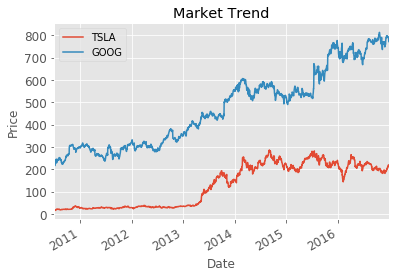

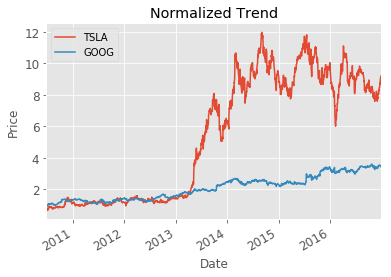

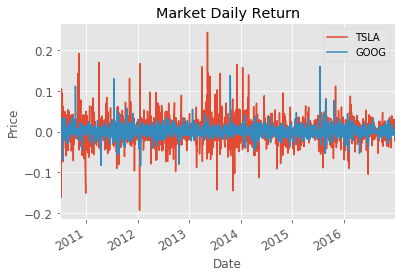

Sharpe Ratio TSLA    0.899865
GOOG    0.885504
dtype: float64


In [172]:
start = pd.to_datetime('2016-01-01')
end = pd.to_datetime('2016-12-31')
symbols = ['TSLA','GOOG']
#df = get_data(start,end,symbols)
#print(df)

plot_df(df, title='Market Trend')
#plot_rolling(df,key=symbols,windows=20,title='Rolling band')

ndf, dr, sr = calculate_portfolio(df)
plot_df(ndf, title='Normalized Trend')
plot_df(dr, title='Market Daily Return')
print('Sharpe Ratio',sr)
#portfolio = calculate_portfolio(df) #structure of portfolio